In [ ]:
!pwd

/content


In [ ]:
!pip install livelossplot==0.5.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 20.9 MB/s 


In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
from livelossplot import PlotLossesKeras
#from livelossplot import PlotLossesTensorFlowKeras
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.9.2


In [ ]:
import zipfile
with zipfile.ZipFile("dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
for expression in os.listdir("images/train/"):
    print(str(len(os.listdir("images/train/"+expression)))+ " "+ expression + " images")

4103 fear images
4982 neutral images
3205 surprise images
3993 angry images
4938 sad images
436 disgust images
7164 happy images


************************angry*************************


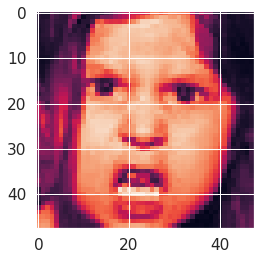

************************disgust*************************


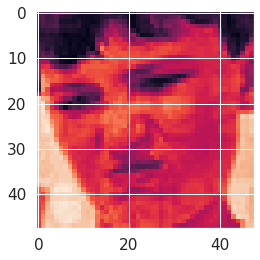

************************fear*************************


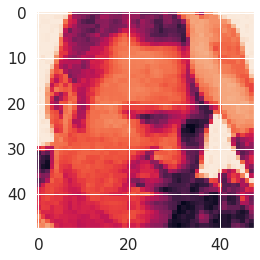

************************happy*************************


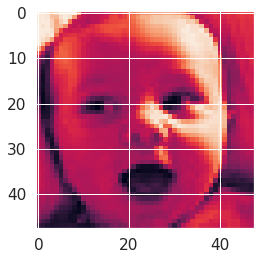

************************neutral*************************


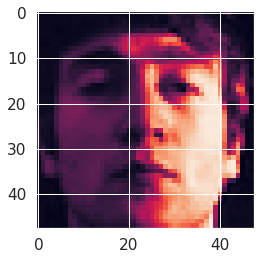

************************sad*************************


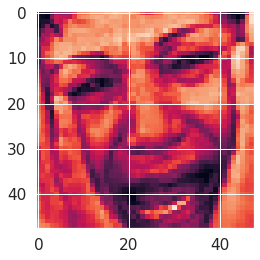

************************surprise*************************


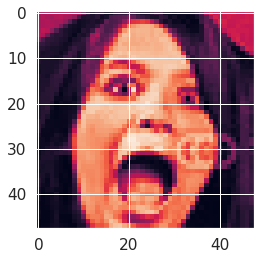

In [ ]:
start = "\033[1m"
end = "\033[0;0m"
list1=["angry","disgust","fear","happy","neutral","sad","surprise"]
list2=["/10002","/10018","/10072","/10001","/10054","/10255","/660"]
import cv2 as cv
sum=0
for folder in list1:
    img2=cv.imread("images/train/"+folder+list2[sum]+".jpg",0)
    print(start+"************************{}*************************".format(folder)+end)
    plt.imshow(img2)
    plt.show()
    sum+=1

In [ ]:
img_size  = 48
batch_size = 64

datagen_train = ImageDataGenerator(horizontal_flip=True)
train_generator = datagen_train.flow_from_directory("images/train",
                                                    target_size=(img_size, img_size),
                                                    color_mode='grayscale',
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_validation.flow_from_directory("images/validation",
                                                    target_size=(img_size, img_size),
                                                    color_mode='grayscale',
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)
for expression in os.listdir("images/train/"):
    print(str(len(os.listdir("images/train/"+expression)))+ " "+ expression + " images")

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
4103 fear images
4982 neutral images
3205 surprise images
3993 angry images
4938 sad images
436 disgust images
7164 happy images


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


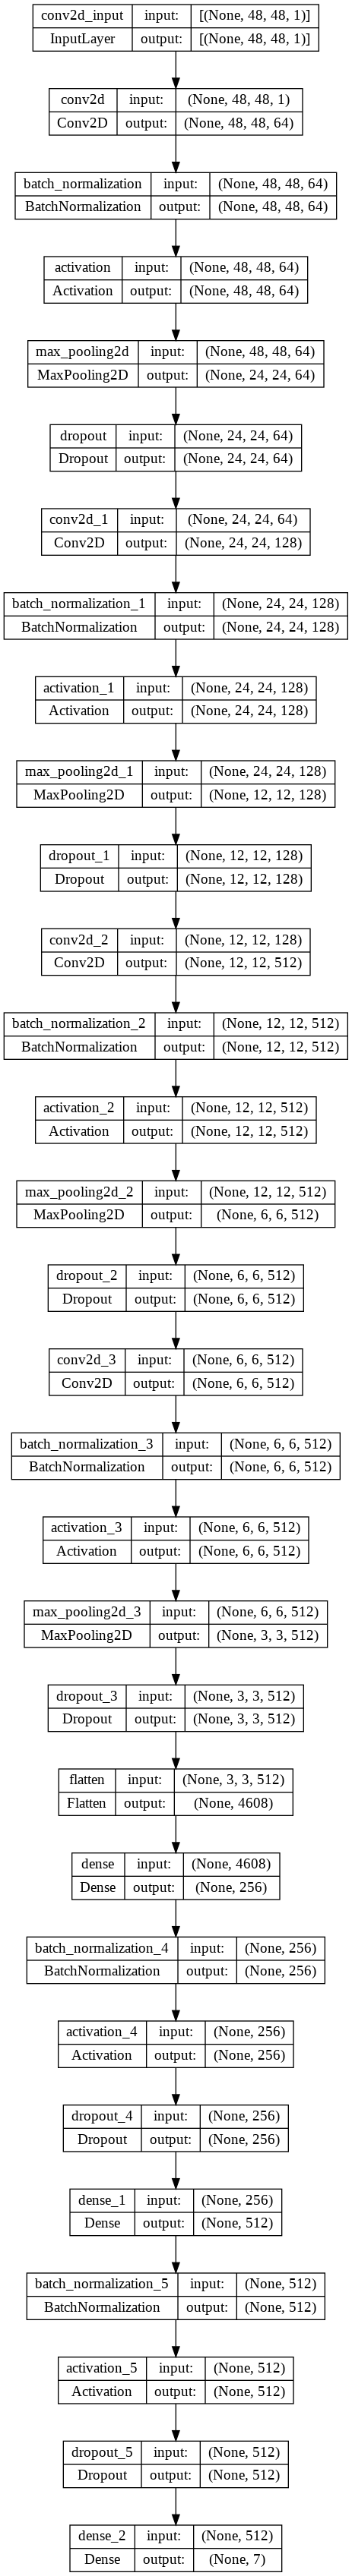

In [ ]:
model = Sequential()

#1 - conv
model.add(Conv2D(64, (3,3), padding = 'same', input_shape=(48,48,1)), )
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))

#2 - conv layer
model.add(Conv2D(128, (5,5), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))


# 3- conv layer
model.add(Conv2D(512, (3,3), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))


# 4 - conv layer
model.add(Conv2D(512, (3,3), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Dropout(0.25))


model.add(Dense(7,activation='softmax'))
opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

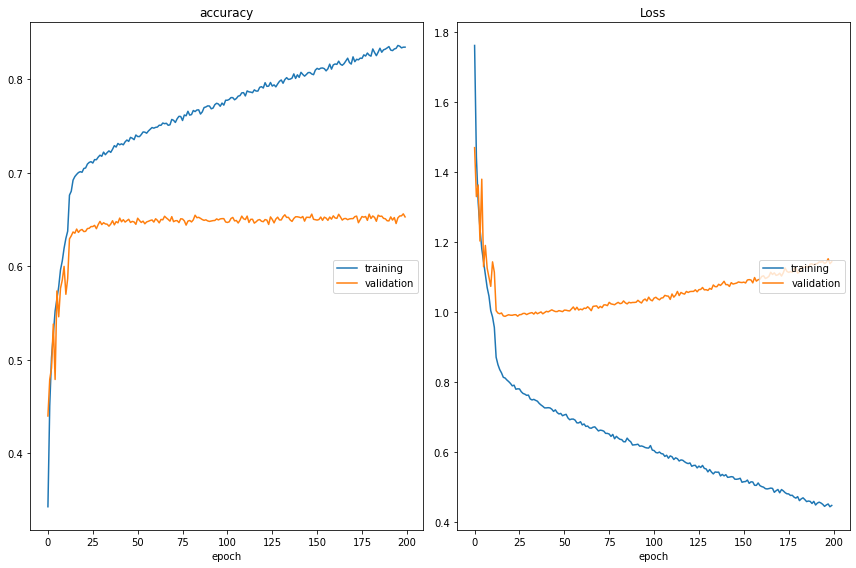

accuracy
	training         	 (min:    0.343, max:    0.836, cur:    0.834)
	validation       	 (min:    0.440, max:    0.656, cur:    0.653)
Loss
	training         	 (min:    0.443, max:    1.763, cur:    0.447)
	validation       	 (min:    0.988, max:    1.470, cur:    1.144)

Epoch 200: saving model to model_weights.h5
451/451 [==============================] - 14s 32ms/step - loss: 0.4469 - accuracy: 0.8345 - val_loss: 1.1440 - val_accuracy: 0.6528 - lr: 1.0000e-05


In [ ]:
epochs = 200

checkpoint = ModelCheckpoint("model_weights.h5", monitor = 'val_acccuracy',
                            save_weigths_only=True, mode='max', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor = 0.01, patience =2, min_lr=0.00001, model = 'auto')

#callbacks = [PlotLossesCallback(), checkpoint, recduce_lr]
callbacks = [PlotLossesKeras(), checkpoint, reduce_lr]
history = model.fit(
    x=train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=callbacks
)

1/1 [==============================] - 0s 79ms/step


<ipython-input-39-f7e130421696>:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plot1 = plt.subplot(box, box, filter_size+1)




  convolution layer with filter size 64  


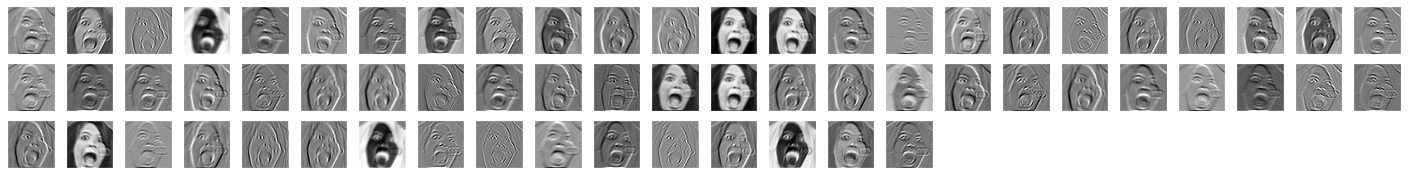



  convolution layer with filter size 128  


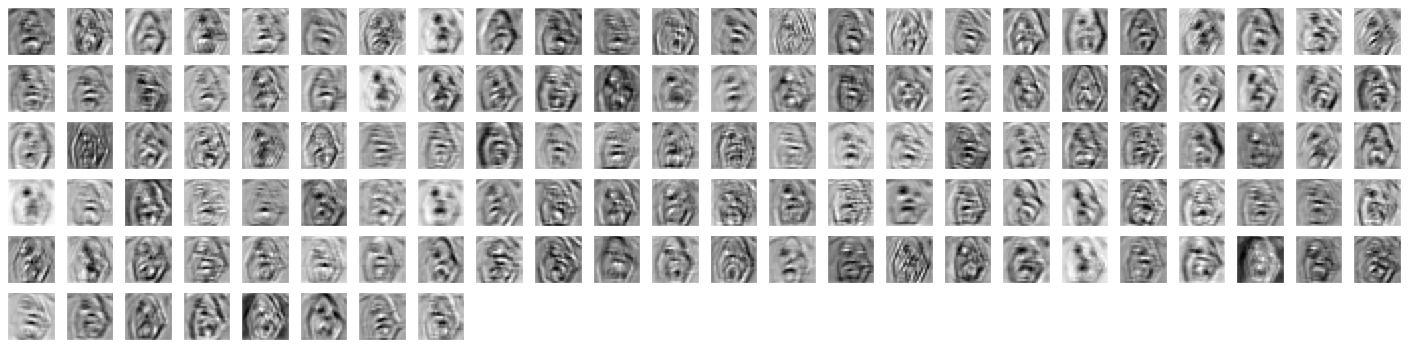



  convolution layer with filter size 512  


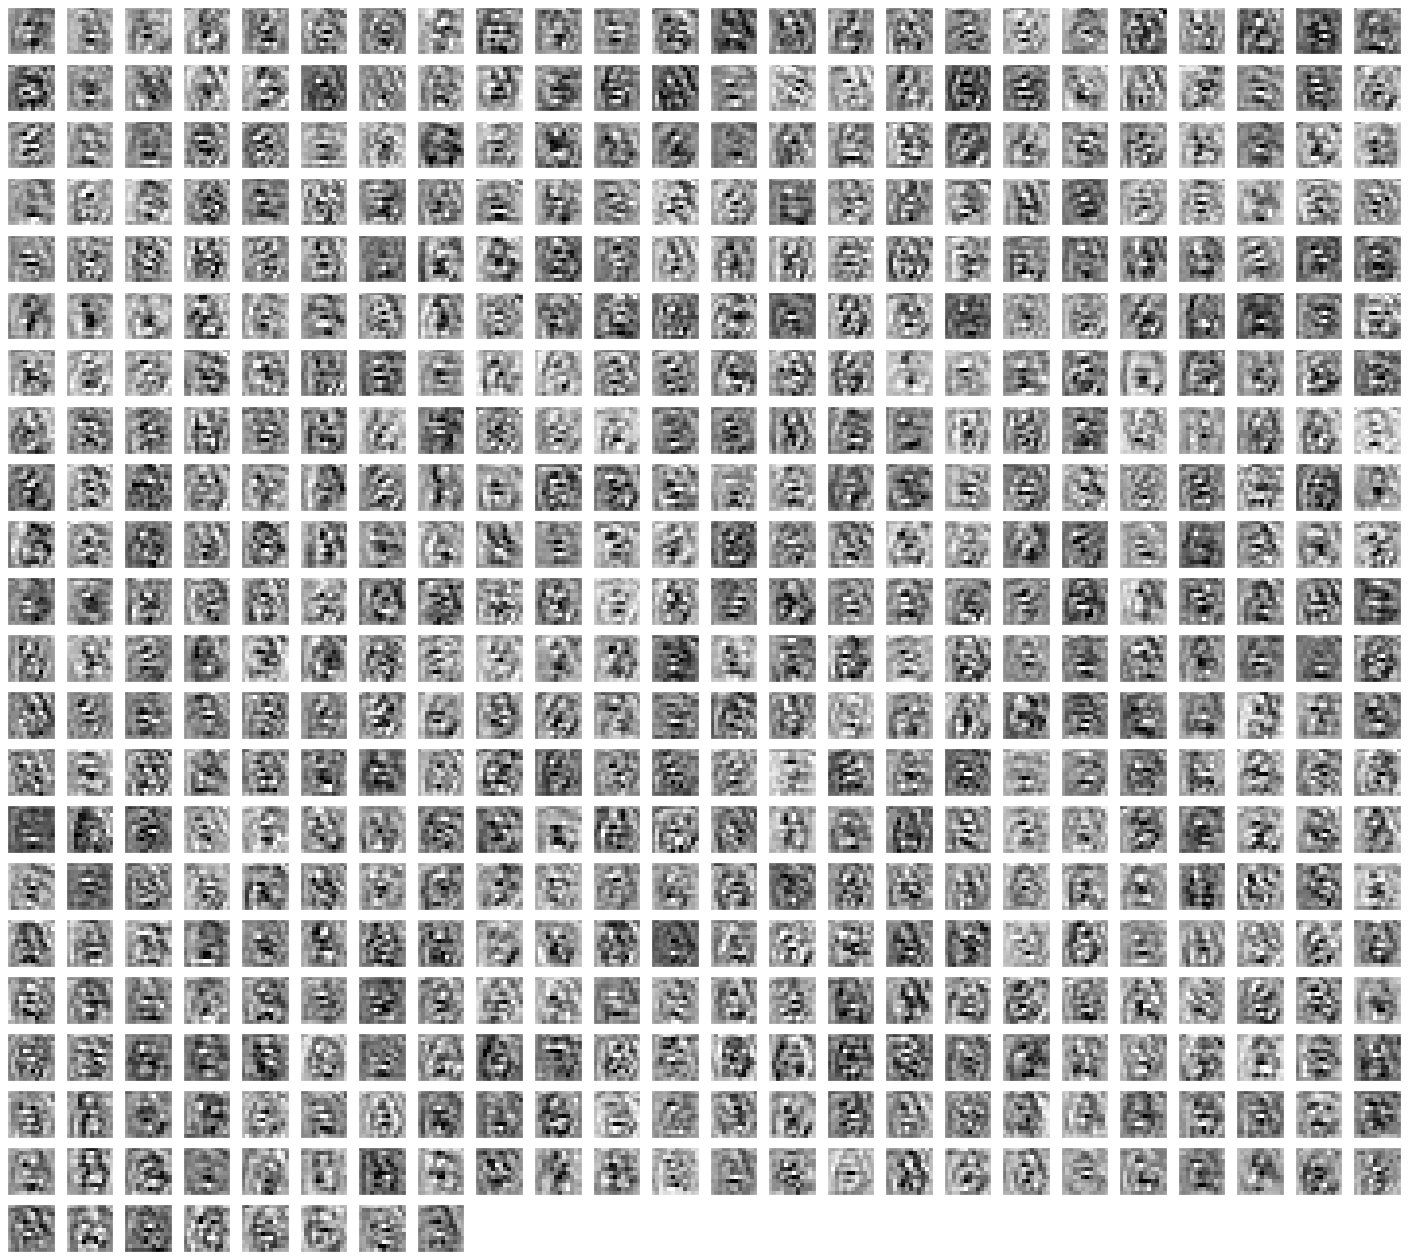

In [ ]:
#only selecting the convolution layers for showing activation maps
conv_layers = [1, 6, 11]
outputs = [model.layers[i].output for i in conv_layers]

conv_model1 = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
# expanding dimensions to make it array of [0,0,0,0] dimensions
img = np.expand_dims(img2, axis=0)

feature_maps = conv_model1.predict(img)
# plotting in size of 16x16 for every convolution layer
box = 24

for f_map in feature_maps:
  plt.figure(figsize=(25,25)) 
  print("\n\n \033[1m convolution layer with filter size {} \033[1m \033[0m".format(len(f_map[0,0,0,:])))
  for filter_size in range(len(f_map[0,0,0,:])):
    
    for _ in range(box):
      for _ in range(box):

        plot1 = plt.subplot(box, box, filter_size+1)
        plot1.set_xticks([])
        plot1.set_yticks([])

        plt.imshow(f_map[0, :, :, filter_size-1],cmap="gray")
# show the figure
  plt.show()

In [ ]:
model_json = model.to_json()
with open ("model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
model.fit_generator(train_generator,
                    steps_per_epoch=28821 // batch_size,
                    epochs=1,
                    validation_data=validation_generator,
                    validation_steps=7066 // batch_size)

  3/450 [..............................] - ETA: 15s - loss: 0.4202 - accuracy: 0.8490

<ipython-input-25-44b4cbfe9576>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator,


450/450 [==============================] - 14s 31ms/step - loss: 0.4396 - accuracy: 0.8399 - val_loss: 1.1510 - val_accuracy: 0.6526


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(validation_generator.class_indices.keys())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

<ipython-input-27-c95b1254098f>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validation_generator)


Confusion Matrix
[[129   9 121 251 177 168 105]
 [  9   2  12  30  20  23  15]
 [130  13 108 272 204 177 114]
 [227  26 220 481 350 314 207]
 [154  19 125 353 227 208 130]
 [151  19 132 314 194 212 117]
 [ 92   6  81 193 158 173  94]]
Classification Report
              precision    recall  f1-score   support

       angry       0.14      0.13      0.14       960
     disgust       0.02      0.02      0.02       111
        fear       0.14      0.11      0.12      1018
       happy       0.25      0.26      0.26      1825
     neutral       0.17      0.19      0.18      1216
         sad       0.17      0.19      0.18      1139
    surprise       0.12      0.12      0.12       797

    accuracy                           0.18      7066
   macro avg       0.14      0.14      0.14      7066
weighted avg       0.17      0.18      0.18      7066



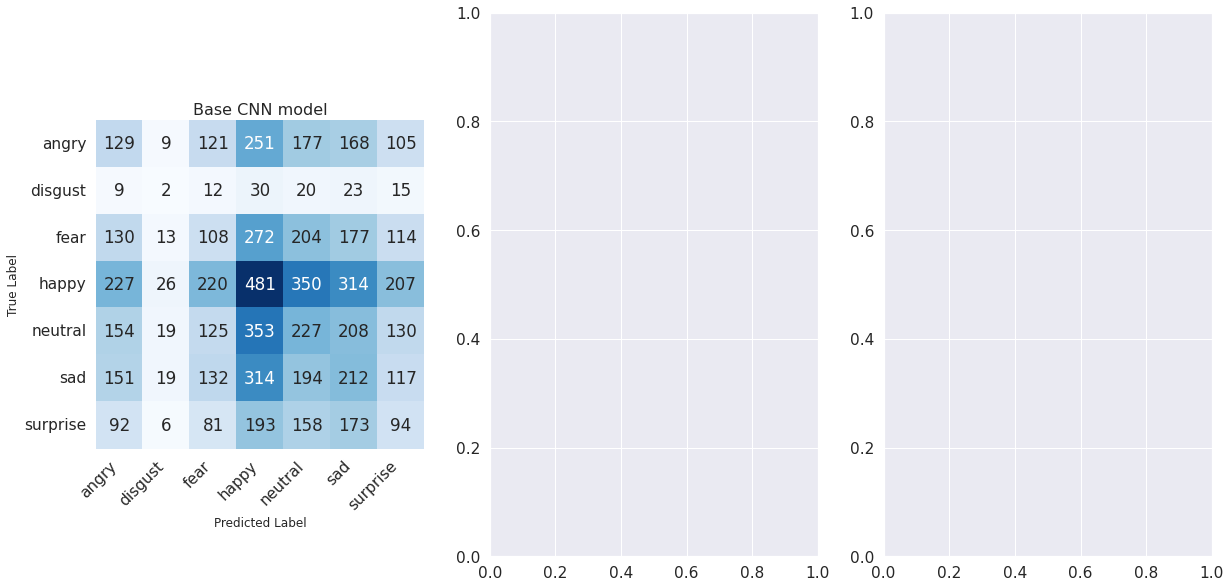

In [ ]:
class_names = train_generator.class_indices.keys()

def plot_heatmap(y_true, y_pred, class_names, ax, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(
        cm, 
        annot=True, 
        square=True, 
        xticklabels=class_names, 
        yticklabels=class_names,
        fmt='d', 
        cmap=plt.cm.Blues,
        cbar=False,
        ax=ax
    )
    ax.set_title(title, fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_ylabel('True Label', fontsize=12)
    ax.set_xlabel('Predicted Label', fontsize=12)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))

plot_heatmap(validation_generator.classes, y_pred, class_names, ax1, title="Base CNN model")    